In [1]:
import numpy as np
import cv2
import math
from scipy import ndimage
from skimage import io

img_before = cv2.imread('./data/images/test1/9.jpg')
# img_before = img_before[66:213, 194:360]

img_before = img_before[45:280, 150:450]

io.imshow(img_before)

img_gray = cv2.cvtColor(img_before, cv2.COLOR_BGR2GRAY)
img_edges = cv2.Canny(img_gray, 100, 100, apertureSize=3)
lines = cv2.HoughLinesP(img_edges, 1, math.pi / 180.0, 100, minLineLength=100, maxLineGap=5)

io.imshow(img_edges)
    
angles = []

for x1, y1, x2, y2 in lines[0]:
    cv2.line(img_before, (x1, y1), (x2, y2), (255, 0, 0), 3)
    angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
    angles.append(angle)

median_angle = np.median(angles)
img_rotated = ndimage.rotate(img_before, median_angle)

print("Angle is {}".format(median_angle))
# io.imshow('rotated.jpg', img_rotated) 

Angle is 0.0


(73.0, 74.0) (73.0, 104.0) (98.0, 74.0)


True

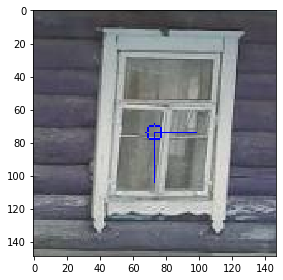

In [11]:
from math import atan2
import numpy as np

def get_angle(p0, p1=np.array([0,0]), p2=None):
    ''' compute angle (in degrees) for p0p1p2 corner
    Inputs:
        p0,p1,p2 - points in the form of [x,y]
    '''
    if p2 is None:
        p2 = p1 + np.array([1, 0])
    v0 = np.array(p0) - np.array(p1)
    v1 = np.array(p2) - np.array(p1)

    angle = np.math.atan2(np.linalg.det([v0,v1]),np.dot(v0,v1))
    return np.degrees(angle)


img_raw = cv2.imread("./data/images/test1/5.jpg")  #load an image of a single battery
img = img_raw[234:383, 700:847]
img_gs = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #convert to grayscale

#inverted binary threshold: 1 for the battery, 0 for the background
_, thresh = cv2.threshold(img_gs, 250, 1, cv2.THRESH_BINARY_INV)

#From a matrix of pixels to a matrix of coordinates of non-black points.
#(note: mind the col/row order, pixels are accessed as [row, col]
#but when we draw, it's (x, y), so have to swap here or there)
mat = np.argwhere(thresh != 0)

#let's swap here... (e. g. [[row, col], ...] to [[col, row], ...])
mat[:, [0, 1]] = mat[:, [1, 0]]
#or we could've swapped at the end, when drawing
#(e. g. center[0], center[1] = center[1], center[0], same for endpoint1 and endpoint2),
#probably better performance-wise


mat = np.array(mat).astype(np.float32) #have to convert type for PCA

#mean (e. g. the geometrical center) 
#and eigenvectors (e. g. directions of principal components)
m, e = cv2.PCACompute(mat, mean = np.array([]))

#now to draw: let's scale our primary axis by 100, 
#and the secondary by 50

center = tuple(m[0])
endpoint1 = tuple(m[0] + e[0]*30)
endpoint2 = tuple(m[0] + e[1]*25)

red_color = (0, 0, 255)
cv2.circle(img, center, 5, red_color)
cv2.line(img, center, endpoint1, red_color)
cv2.line(img, center, endpoint2, red_color)

# angle = get_angle(endpoint1 - center, endpoint2 - center)
print(center, endpoint1, endpoint2)
io.imshow(img)
cv2.imwrite("out.png", img)